In [1]:
# Import Dependancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Read CSV.files
aob_2010 = pd.read_csv("data/aob_2010.csv", thousands=',')
aob_2015 = pd.read_csv("data/aob_2015.csv", thousands=',')
aob_2020 = pd.read_csv("data/aob_2020.csv", thousands=',')
nob_2010 = pd.read_csv("data/nob_2010.csv", thousands=',')
nob_2015 = pd.read_csv("data/nob_2015.csv", thousands=',')
nob_2020 = pd.read_csv("data/nob_2020.csv", thousands=',')

In [3]:
nob_2010 = nob_2010.drop(columns=['Unnamed: 14', 'Unnamed: 15'])

In [4]:
nob_2015.columns


Index(['State or area', 'County', 'ANSI Code', 'Total',
       'Retirement Retired workers', 'Retirement Spouses',
       'Retirement Children', 'Survivors Widow(er)s and parents',
       'Survivors Children', 'Disability Disabled workers',
       'Disability Spouses', 'Disability Children', 'Aged 65 or older Men',
       'Aged 65 or older Women'],
      dtype='object')

In [5]:
convert_dict = {"Total": float,
                "Retirement Retired workers": float,
               "Retirement Spouses": float,
              "Retirement Children": float,
               "Survivors Widow(er)s and parents": float,
               "Survivors Children": float,
               "Disability Disabled workers": float,
               "Disability Spouses": float,
               "Disability Children": float,
               "Aged 65 or older Men": float,
               "Aged 65 or older Women" : float}
aob_2010 = aob_2010.astype(convert_dict)

In [6]:
convert_dict = {"Total_people": float,
                "Retirement Retired workers": float,
               "Retirement Spouses": float,
              "Retirement Children": float,
               "Survivors Widow(er)s and parents": float,
               "Survivors Children": float,
               "Disability Disabled workers": float,
               "Disability Spouses": float,
               "Disability Children": float,
               "Aged 65 or older Men": float,
               "Aged 65 or older Women" : float}
nob_2010 = nob_2010.astype(convert_dict)

In [7]:
convert_dict = {"Total": float,
                "Retirement Retired workers": float,
               "Retirement Spouses": float,
              "Retirement Children": float,
               "Survivors Widow(er)s and parents": float,
               "Survivors Children": float,
               "Disability Disabled workers": float,
               "Disability Spouses": float,
               "Disability Children": float,
               "Aged 65 or older Men": float,
               "Aged 65 or older Women" : float}
aob_2015 = aob_2015.astype(convert_dict)

In [8]:
convert_dict = {"Total": float,
                "Retirement Retired workers": float,
               "Retirement Spouses": float,
              "Retirement Children": float,
               "Survivors Widow(er)s and parents": float,
               "Survivors Children": float,
               "Disability Disabled workers": float,
               "Disability Spouses": float,
               "Disability Children": float,
               "Aged 65 or older Men": float,
               "Aged 65 or older Women" : float}
nob_2015 = nob_2015.astype(convert_dict)

In [9]:
convert_dict = {"Total": float,
                "Retirement Retired workers": float,
               "Retirement Spouses": float,
              "Retirement Children": float,
               "Survivors Widow(er)s and parents": float,
               "Survivors Children": float,
               "Disability Disabled workers": float,
               "Disability Spouses": float,
               "Disability Children": float,
               "Aged 65 or older Men": float,
               "Aged 65 or older Women" : float}
aob_2020 = aob_2020.astype(convert_dict)

In [10]:
convert_dict = {"Total": float,
                "Retirement Retired workers": float,
               "Retirement Spouses": float,
              "Retirement Children": float,
               "Survivors Widow(er)s and parents": float,
               "Survivors Children": float,
               "Disability Disabled workers": float,
               "Disability Spouses": float,
               "Disability Children": float,
               "Aged 65 or older Men": float,
               "Aged 65 or older Women" : float}
nob_2020 = nob_2020.astype(convert_dict)

In [11]:
# Merged Files
df_2010 = pd.merge(aob_2010, nob_2010, on=["State or area", "County"], how='outer')
df_2015 = pd.merge(aob_2015, nob_2015, on=["State or area", "County"], how='outer')
df_2020 = pd.merge(aob_2020, nob_2020, on=["State or area", "County"], how='outer')

In [12]:
df_2010.columns

Index(['State or area', 'County', 'ANSI Code_x', 'Total',
       'Retirement Retired workers_x', 'Retirement Spouses_x',
       'Retirement Children_x', 'Survivors Widow(er)s and parents_x',
       'Survivors Children_x', 'Disability Disabled workers_x',
       'Disability Spouses_x', 'Disability Children_x',
       'Aged 65 or older Men_x', 'Aged 65 or older Women_x', 'ANSI Code_y',
       'Total_people', 'Retirement Retired workers_y', 'Retirement Spouses_y',
       'Retirement Children_y', 'Survivors Widow(er)s and parents_y',
       'Survivors Children_y', 'Disability Disabled workers_y',
       'Disability Spouses_y', 'Disability Children_y',
       'Aged 65 or older Men_y', 'Aged 65 or older Women_y'],
      dtype='object')

In [13]:
# Display column heads
df_2010.head()

,State or area,County,ANSI Code_x,Total,Retirement Retired workers_x,Retirement Spouses_x,Retirement Children_x,Survivors Widow(er)s and parents_x,Survivors Children_x,Disability Disabled workers_x,...,Retirement Retired workers_y,Retirement Spouses_y,Retirement Children_y,Survivors Widow(er)s and parents_y,Survivors Children_y,Disability Disabled workers_y,Disability Spouses_y,Disability Children_y,Aged 65 or older Men_y,Aged 65 or older Women_y
0,United States,NaN,NaN,58048295.0,40662492.0,1343640.0,334405.0,4884520.0,1437963.0,8759959.0,...,34593080.0,2316536.0,579859.0,4445547.0,1912789.0,8203951.0,160300.0,1819906.0,16195967.0,21095605.0
1,Alabama,Autauga,1001.0,10224.0,6352.0,226.0,57.0,849.0,322.0,2221.0,...,5540.0,385.0,95.0,845.0,435.0,2115.0,45.0,590.0,2595.0,3430.0
2,Alabama,Baldwin,1003.0,46097.0,32376.0,1097.0,251.0,3694.0,1005.0,7164.0,...,27340.0,1745.0,415.0,3290.0,1310.0,6455.0,140.0,1365.0,12970.0,15610.0
3,Alabama,Barbour,1005.0,6213.0,3636.0,107.0,31.0,499.0,186.0,1633.0,...,3440.0,195.0,65.0,570.0,305.0,1640.0,35.0,420.0,1625.0,2130.0
4,Alabama,Bibb,1007.0,4960.0,2608.0,97.0,31.0,459.0,202.0,1442.0,...,2360.0,175.0,55.0,505.0,280.0,1400.0,30.0,375.0,1155.0,1525.0


In [14]:
# Rename columns in df_2010
df_2010.columns = ['State or area', 'County', 'ANSI Code_amount', 'Total_amount', 
        'Retirement Retired workers_amount', 'Retirement Spouses_amount',
        'Retirement Children_amount', 'Survivors Widow(er)s and parents_amount',
       'Survivors Children_amount', 'Disability Disabled workers_amount',
       'Disability Spouses_amount', 'Disability Children_amount',
       'Aged 65 or older Men_amount', 'Aged 65 or older Women_amount', 'ANSI Code_people',
       'Total_people', 'Retirement Retired workers_people', 'Retirement Spouses_people',
       'Retirement Children_people', 'Survivors Widow(er)s and parents_people',
       'Survivors Children_people', 'Disability Disabled workers_people',
       'Disability Spouses_people', 'Disability Children_people',
       'Aged 65 or older Men_people', 'Aged 65 or older Women_people']

In [15]:
# Rename columns in df_2015
df_2015.columns = ['State or area', 'County', 'ANSI Code_amount', 'Total_amount', 
        'Retirement Retired workers_amount', 'Retirement Spouses_amount',
        'Retirement Children_amount', 'Survivors Widow(er)s and parents_amount',
       'Survivors Children_amount', 'Disability Disabled workers_amount',
       'Disability Spouses_amount', 'Disability Children_amount',
       'Aged 65 or older Men_amount', 'Aged 65 or older Women_amount', 'ANSI Code_people',
       'Total_people', 'Retirement Retired workers_people', 'Retirement Spouses_people',
       'Retirement Children_people', 'Survivors Widow(er)s and parents_people',
       'Survivors Children_people', 'Disability Disabled workers_people',
       'Disability Spouses_people', 'Disability Children_people',
       'Aged 65 or older Men_people', 'Aged 65 or older Women_people']

In [16]:
# Rename columns in df_2020
df_2020.columns = ['State or area', 'County', 'ANSI Code_amount', 'Total_amount', 
        'Retirement Retired workers_amount', 'Retirement Spouses_amount',
        'Retirement Children_amount', 'Survivors Widow(er)s and parents_amount',
       'Survivors Children_amount', 'Disability Disabled workers_amount',
       'Disability Spouses_amount', 'Disability Children_amount',
       'Aged 65 or older Men_amount', 'Aged 65 or older Women_amount', 'ANSI Code_people',
       'Total_people', 'Retirement Retired workers_people', 'Retirement Spouses_people',
       'Retirement Children_people', 'Survivors Widow(er)s and parents_people',
       'Survivors Children_people', 'Disability Disabled workers_people',
       'Disability Spouses_people', 'Disability Children_people',
       'Aged 65 or older Men_people', 'Aged 65 or older Women_people']

In [17]:
# Sum of NaN values in df_2010
df_2010.isna().sum()

State or area                              0
County                                     7
ANSI Code_amount                           3
Total_amount                               0
Retirement Retired workers_amount          0
Retirement Spouses_amount                  0
Retirement Children_amount                 0
Survivors Widow(er)s and parents_amount    0
Survivors Children_amount                  0
Disability Disabled workers_amount         0
Disability Spouses_amount                  0
Disability Children_amount                 0
Aged 65 or older Men_amount                0
Aged 65 or older Women_amount              0
ANSI Code_people                           3
Total_people                               1
Retirement Retired workers_people          1
Retirement Spouses_people                  1
Retirement Children_people                 1
Survivors Widow(er)s and parents_people    1
Survivors Children_people                  1
Disability Disabled workers_people         1
Disability

In [18]:
# Sum of NaN values in df_2015
df_2015.isna().sum()

State or area                              0
County                                     7
ANSI Code_amount                           4
Total_amount                               1
Retirement Retired workers_amount          1
Retirement Spouses_amount                  1
Retirement Children_amount                 1
Survivors Widow(er)s and parents_amount    1
Survivors Children_amount                  1
Disability Disabled workers_amount         1
Disability Spouses_amount                  1
Disability Children_amount                 1
Aged 65 or older Men_amount                1
Aged 65 or older Women_amount              1
ANSI Code_people                           4
Total_people                               1
Retirement Retired workers_people          1
Retirement Spouses_people                  1
Retirement Children_people                 1
Survivors Widow(er)s and parents_people    1
Survivors Children_people                  1
Disability Disabled workers_people         1
Disability

In [19]:
# Sum of NaN values in df_2020
df_2020.isna().sum()

State or area                               0
County                                     10
ANSI Code_amount                           14
Total_amount                               11
Retirement Retired workers_amount          11
Retirement Spouses_amount                  11
Retirement Children_amount                 11
Survivors Widow(er)s and parents_amount    11
Survivors Children_amount                  11
Disability Disabled workers_amount         11
Disability Spouses_amount                  11
Disability Children_amount                 11
Aged 65 or older Men_amount                11
Aged 65 or older Women_amount              11
ANSI Code_people                           13
Total_people                               10
Retirement Retired workers_people          10
Retirement Spouses_people                  10
Retirement Children_people                 10
Survivors Widow(er)s and parents_people    10
Survivors Children_people                  10
Disability Disabled workers_people

In [20]:
# Display NaN values in df_2010
df_2010[df_2010['County'].isna()]

,State or area,County,ANSI Code_amount,Total_amount,Retirement Retired workers_amount,Retirement Spouses_amount,Retirement Children_amount,Survivors Widow(er)s and parents_amount,Survivors Children_amount,Disability Disabled workers_amount,...,Retirement Retired workers_people,Retirement Spouses_people,Retirement Children_people,Survivors Widow(er)s and parents_people,Survivors Children_people,Disability Disabled workers_people,Disability Spouses_people,Disability Children_people,Aged 65 or older Men_people,Aged 65 or older Women_people
0,United States,NaN,NaN,58048295.0,40662492.0,1343640.0,334405.0,4884520.0,1437963.0,8759959.0,...,34593080.0,2316536.0,579859.0,4445547.0,1912789.0,8203951.0,160300.0,1819906.0,16195967.0,21095605.0
320,District of Columbia,NaN,11000.0,72460.0,50851.0,1029.0,444.0,4985.0,2382.0,12201.0,...,48173.0,1723.0,826.0,5283.0,3731.0,12843.0,35.0,1803.0,21377.0,30505.0
3158,Outlying areas,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3159,American Samoa,NaN,60000.0,3656.0,1481.0,61.0,125.0,377.0,406.0,1056.0,...,1925.0,190.0,352.0,586.0,902.0,1271.0,60.0,765.0,1071.0,1152.0
3160,Guam,NaN,66000.0,9918.0,6098.0,353.0,205.0,991.0,763.0,1360.0,...,7742.0,979.0,543.0,1339.0,1388.0,1490.0,64.0,580.0,4195.0,4338.0
3161,Northern Mariana\n Islands,NaN,69000.0,1346.0,768.0,36.0,72.0,146.0,152.0,159.0,...,1179.0,124.0,257.0,289.0,348.0,226.0,10.0,79.0,629.0,543.0
3243,Foreign countries,NaN,NaN,320754.0,209415.0,22312.0,3925.0,60530.0,10099.0,13066.0,...,333247.0,86030.0,9740.0,86594.0,15248.0,13349.0,614.0,3493.0,219907.0,247957.0


In [21]:
# Display NaN values in df_2015
df_2015[df_2015['County'].isna()]

,State or area,County,ANSI Code_amount,Total_amount,Retirement Retired workers_amount,Retirement Spouses_amount,Retirement Children_amount,Survivors Widow(er)s and parents_amount,Survivors Children_amount,Disability Disabled workers_amount,...,Retirement Retired workers_people,Retirement Spouses_people,Retirement Children_people,Survivors Widow(er)s and parents_people,Survivors Children_people,Disability Disabled workers_people,Disability Spouses_people,Disability Children_people,Aged 65 or older Men_people,Aged 65 or older Women_people
0,United States,NaN,NaN,73642029.0,53790278.0,1612415.0,422191.0,5194659.0,1575147.0,10386494.0,...,40089061.0,2335807.0,648530.0,4190676.0,1892885.0,8909430.0,141760.0,1755276.0,19144628.0,24098571.0
3155,Outlying areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3156,American Samoa,NaN,60000.0,4338.0,1999.0,79.0,108.0,447.0,400.0,1162.0,...,2277.0,208.0,278.0,607.0,804.0,1331.0,54.0,677.0,1221.0,1348.0
3157,Guam,NaN,66000.0,13555.0,8950.0,455.0,259.0,1230.0,804.0,1694.0,...,9919.0,1057.0,602.0,1472.0,1291.0,1642.0,67.0,578.0,5283.0,5651.0
3158,Northern Mariana Islands,NaN,69000.0,1742.0,1061.0,42.0,71.0,194.0,164.0,195.0,...,1489.0,116.0,186.0,311.0,315.0,249.0,10.0,74.0,799.0,723.0
3240,Foreign countries,NaN,NaN,402455.0,272517.0,29706.0,5265.0,70326.0,11155.0,12000.0,...,390368.0,104546.0,10851.0,92364.0,14608.0,10773.0,529.0,3191.0,264860.0,290151.0
3241,Unknown,NaN,NaN,2318.0,1787.0,46.0,8.0,252.0,35.0,181.0,...,1363.0,75.0,12.0,215.0,38.0,142.0,3.0,26.0,784.0,817.0


In [22]:
# Display NaN values in df_2020
df_2020[df_2020['County'].isna()]

,State or area,County,ANSI Code_amount,Total_amount,Retirement Retired workers_amount,Retirement Spouses_amount,Retirement Children_amount,Survivors Widow(er)s and parents_amount,Survivors Children_amount,Disability Disabled workers_amount,...,Retirement Retired workers_people,Retirement Spouses_people,Retirement Children_people,Survivors Widow(er)s and parents_people,Survivors Children_people,Disability Disabled workers_people,Disability Spouses_people,Disability Children_people,Aged 65 or older Men_people,Aged 65 or older Women_people
0,United States,NaN,NaN,58048295.0,40662492.0,1343640.0,334405.0,4884520.0,1437963.0,8759959.0,...,46329595.0,2324030.0,704207.0,3938577.0,1936071.0,8151016.0,104014.0,1363357.0,22310264.0,27516391.0
320,District of Columbia,NaN,11000.0,72460.0,50851.0,1029.0,444.0,4985.0,2382.0,12201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3156,Outlying areas,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3157,American Samoa,NaN,60000.0,3656.0,1481.0,61.0,125.0,377.0,406.0,1056.0,...,2629.0,189.0,224.0,596.0,671.0,1271.0,39.0,480.0,1378.0,1508.0
3158,Guam,NaN,66000.0,9918.0,6098.0,353.0,205.0,991.0,763.0,1360.0,...,12566.0,1065.0,522.0,1565.0,1199.0,1548.0,61.0,506.0,6533.0,7027.0
3159,Northern Mariana\n Islands,NaN,69000.0,1346.0,768.0,36.0,72.0,146.0,152.0,159.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241,Foreign countries,NaN,NaN,320754.0,209415.0,22312.0,3925.0,60530.0,10099.0,13066.0,...,441268.0,115815.0,11693.0,99618.0,13420.0,8869.0,395.0,2843.0,303252.0,328949.0
3250,Outlying areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3251,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2010.0,133.0,167.0,314.0,323.0,281.0,6.0,76.0,1041.0,990.0
3252,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,717.0,41.0,7.0,108.0,19.0,81.0,1.0,22.0,387.0,451.0


In [23]:
# Drop outlying areas in df_2010
df_2010.drop(df_2010[df_2010['State or area'].str.contains('Outlying areas')].index, inplace=True)

In [24]:
# Display clean DataFrame for df_2010
df_2010[df_2010['County'].isna()]

,State or area,County,ANSI Code_amount,Total_amount,Retirement Retired workers_amount,Retirement Spouses_amount,Retirement Children_amount,Survivors Widow(er)s and parents_amount,Survivors Children_amount,Disability Disabled workers_amount,...,Retirement Retired workers_people,Retirement Spouses_people,Retirement Children_people,Survivors Widow(er)s and parents_people,Survivors Children_people,Disability Disabled workers_people,Disability Spouses_people,Disability Children_people,Aged 65 or older Men_people,Aged 65 or older Women_people
0,United States,NaN,NaN,58048295.0,40662492.0,1343640.0,334405.0,4884520.0,1437963.0,8759959.0,...,34593080.0,2316536.0,579859.0,4445547.0,1912789.0,8203951.0,160300.0,1819906.0,16195967.0,21095605.0
320,District of Columbia,NaN,11000.0,72460.0,50851.0,1029.0,444.0,4985.0,2382.0,12201.0,...,48173.0,1723.0,826.0,5283.0,3731.0,12843.0,35.0,1803.0,21377.0,30505.0
3159,American Samoa,NaN,60000.0,3656.0,1481.0,61.0,125.0,377.0,406.0,1056.0,...,1925.0,190.0,352.0,586.0,902.0,1271.0,60.0,765.0,1071.0,1152.0
3160,Guam,NaN,66000.0,9918.0,6098.0,353.0,205.0,991.0,763.0,1360.0,...,7742.0,979.0,543.0,1339.0,1388.0,1490.0,64.0,580.0,4195.0,4338.0
3161,Northern Mariana\n Islands,NaN,69000.0,1346.0,768.0,36.0,72.0,146.0,152.0,159.0,...,1179.0,124.0,257.0,289.0,348.0,226.0,10.0,79.0,629.0,543.0
3243,Foreign countries,NaN,NaN,320754.0,209415.0,22312.0,3925.0,60530.0,10099.0,13066.0,...,333247.0,86030.0,9740.0,86594.0,15248.0,13349.0,614.0,3493.0,219907.0,247957.0


In [25]:
# Drop outlying areas in df_2015
df_2015.drop(df_2015[df_2015['State or area'].str.contains('Outlying areas')].index, inplace=True)

In [26]:
# Display clean DataFrame for df_2015
df_2015[df_2015['County'].isna()]

,State or area,County,ANSI Code_amount,Total_amount,Retirement Retired workers_amount,Retirement Spouses_amount,Retirement Children_amount,Survivors Widow(er)s and parents_amount,Survivors Children_amount,Disability Disabled workers_amount,...,Retirement Retired workers_people,Retirement Spouses_people,Retirement Children_people,Survivors Widow(er)s and parents_people,Survivors Children_people,Disability Disabled workers_people,Disability Spouses_people,Disability Children_people,Aged 65 or older Men_people,Aged 65 or older Women_people
0,United States,NaN,NaN,73642029.0,53790278.0,1612415.0,422191.0,5194659.0,1575147.0,10386494.0,...,40089061.0,2335807.0,648530.0,4190676.0,1892885.0,8909430.0,141760.0,1755276.0,19144628.0,24098571.0
3156,American Samoa,NaN,60000.0,4338.0,1999.0,79.0,108.0,447.0,400.0,1162.0,...,2277.0,208.0,278.0,607.0,804.0,1331.0,54.0,677.0,1221.0,1348.0
3157,Guam,NaN,66000.0,13555.0,8950.0,455.0,259.0,1230.0,804.0,1694.0,...,9919.0,1057.0,602.0,1472.0,1291.0,1642.0,67.0,578.0,5283.0,5651.0
3158,Northern Mariana Islands,NaN,69000.0,1742.0,1061.0,42.0,71.0,194.0,164.0,195.0,...,1489.0,116.0,186.0,311.0,315.0,249.0,10.0,74.0,799.0,723.0
3240,Foreign countries,NaN,NaN,402455.0,272517.0,29706.0,5265.0,70326.0,11155.0,12000.0,...,390368.0,104546.0,10851.0,92364.0,14608.0,10773.0,529.0,3191.0,264860.0,290151.0
3241,Unknown,NaN,NaN,2318.0,1787.0,46.0,8.0,252.0,35.0,181.0,...,1363.0,75.0,12.0,215.0,38.0,142.0,3.0,26.0,784.0,817.0


In [27]:
# Drop outlying areas in df_2020
df_2020.drop(df_2020[df_2020['State or area'].str.contains('Outlying areas')].index, inplace=True)

In [28]:
# Display clean DataFrame for df_2020
df_2020[df_2020['County'].isna()]

,State or area,County,ANSI Code_amount,Total_amount,Retirement Retired workers_amount,Retirement Spouses_amount,Retirement Children_amount,Survivors Widow(er)s and parents_amount,Survivors Children_amount,Disability Disabled workers_amount,...,Retirement Retired workers_people,Retirement Spouses_people,Retirement Children_people,Survivors Widow(er)s and parents_people,Survivors Children_people,Disability Disabled workers_people,Disability Spouses_people,Disability Children_people,Aged 65 or older Men_people,Aged 65 or older Women_people
0,United States,NaN,NaN,58048295.0,40662492.0,1343640.0,334405.0,4884520.0,1437963.0,8759959.0,...,46329595.0,2324030.0,704207.0,3938577.0,1936071.0,8151016.0,104014.0,1363357.0,22310264.0,27516391.0
320,District of Columbia,NaN,11000.0,72460.0,50851.0,1029.0,444.0,4985.0,2382.0,12201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3157,American Samoa,NaN,60000.0,3656.0,1481.0,61.0,125.0,377.0,406.0,1056.0,...,2629.0,189.0,224.0,596.0,671.0,1271.0,39.0,480.0,1378.0,1508.0
3158,Guam,NaN,66000.0,9918.0,6098.0,353.0,205.0,991.0,763.0,1360.0,...,12566.0,1065.0,522.0,1565.0,1199.0,1548.0,61.0,506.0,6533.0,7027.0
3159,Northern Mariana\n Islands,NaN,69000.0,1346.0,768.0,36.0,72.0,146.0,152.0,159.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241,Foreign countries,NaN,NaN,320754.0,209415.0,22312.0,3925.0,60530.0,10099.0,13066.0,...,441268.0,115815.0,11693.0,99618.0,13420.0,8869.0,395.0,2843.0,303252.0,328949.0
3251,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2010.0,133.0,167.0,314.0,323.0,281.0,6.0,76.0,1041.0,990.0
3252,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,717.0,41.0,7.0,108.0,19.0,81.0,1.0,22.0,387.0,451.0


# What is the trend of social security payout overtime? (2010-2020)

## 2010 Breakdown by States

### Total Amounts

In [29]:
states_amount_2010 = df_2010.groupby(['State or area'])['Total_amount'].sum()
states_amount_2010

State or area
Alabama                          1035826.0
Alaska                             79907.0
American Samoa                      3656.0
Arizona                          1185927.0
Arkansas                          632019.0
California                       5356830.0
Colorado                          749163.0
Connecticut                       742890.0
Delaware                          199834.0
District of Columbia               72460.0
Florida                          4118532.0
Foreign countries                 320754.0
Georgia                          1550476.0
Guam                                9918.0
Hawaii                            248933.0
Idaho                             284101.0
Illinois                         2269006.0
Indiana                          1337204.0
Iowa                              633785.0
Kansas                            539541.0
Kentucky                          893650.0
Louisiana                         772878.0
Maine                             299169

### Total Number of People

In [30]:
states_people_2010 = df_2010.groupby(['State or area'])['Total_people'].sum()

In [31]:
correlation_df_2010 = pd.merge(states_people_2010, states_amount_2010, on="State or area", how="right")

### Correlation between the amount of benefits and the number of beneficiaries

The correlation between both factors is 1.0


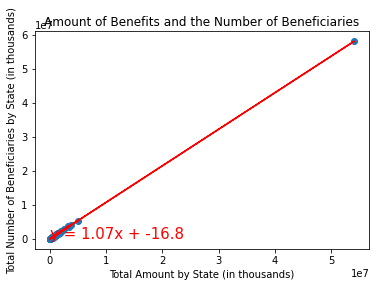

In [32]:
people_2010 = correlation_df_2010.iloc[:,0]
amount_2010 = correlation_df_2010.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(people_2010, amount_2010)
regress_values = people_2010 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(people_2010,amount_2010)
plt.scatter(people_2010,amount_2010)
plt.plot(people_2010, amount_2010, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Amount of Benefits and the Number of Beneficiaries')
plt.xlabel('Total Amount by State (in thousands)')
plt.ylabel('Total Number of Beneficiaries by State (in thousands)')
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

Analysis: The correlation between the number

## 2015 Breakdown by States

### Total Amounts

In [33]:
states_amount_2015 = df_2015.groupby(['State or area'])['Total_amount'].sum()

### Total Number of People

In [34]:
states_people_2015 = df_2015.groupby(['State or area'])['Total_people'].sum()
correlation_df_2015 = pd.merge(states_people_2015, states_amount_2015, on="State or area", how="right")

### Correlation between the amount of benefits and the number of beneficiaries

The correlation between both factors is 1.0


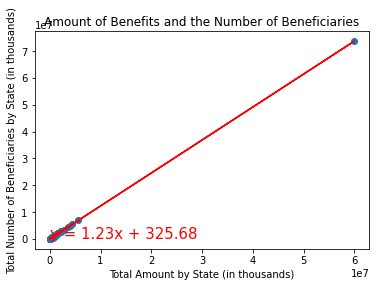

In [35]:
people_2015 = correlation_df_2015.iloc[:,0]
amount_2015 = correlation_df_2015.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(people_2015, amount_2015)
regress_values = people_2015 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(people_2015,amount_2015)
plt.scatter(people_2015,amount_2015)
plt.plot(people_2015, amount_2015, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Amount of Benefits and the Number of Beneficiaries')
plt.xlabel('Total Amount by State (in thousands)')
plt.ylabel('Total Number of Beneficiaries by State (in thousands)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

Analysis: The correlation between the number

## 2020 Breakdown by States

### Total Amounts

In [36]:
states_amount_2020 = df_2020.groupby(['State or area'])['Total_amount'].sum()

### Total Number of People

In [37]:
states_people_2020 = df_2020.groupby(['State or area'])['Total_people'].sum()
correlation_df_2020 = pd.merge(states_people_2020, states_amount_2020, on="State or area", how="right")

### Correlation between the amount of benefits and the number of beneficiaries

The correlation between both factors is 1.0


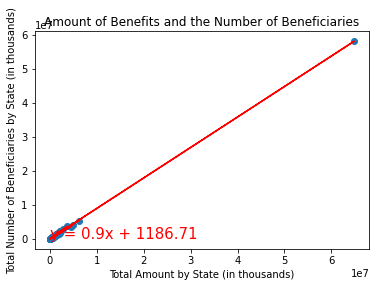

In [38]:
people_2020 = correlation_df_2020.iloc[:,0]
amount_2020 = correlation_df_2020.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(people_2020, amount_2020)
regress_values = people_2020 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(people_2020,amount_2020)
plt.scatter(people_2020,amount_2020)
plt.plot(people_2020, amount_2020, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Amount of Benefits and the Number of Beneficiaries')
plt.xlabel('Total Amount by State (in thousands)')
plt.ylabel('Total Number of Beneficiaries by State (in thousands)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

Analysis: The correlation between the number

## Average Payout Overtime

In [39]:
a_amount_2010 =df_2010['Total_amount'].sum()
a_people_2010=df_2010['Total_people'].sum()
average_payout_2010 = a_amount_2010/a_people_2010
average_payout_2010=average_payout_2010*1000
average_payout_2010

1074.6633276981006

In [40]:
a_amount_2015 =df_2015['Total_amount'].sum()
a_people_2015=df_2015['Total_people'].sum()
average_payout_2015 = a_amount_2015/a_people_2015
average_payout_2015=average_payout_2015*1000
average_payout_2015

1228.5304189502242

In [41]:
a_amount_2020 =df_2020['Total_amount'].sum()
a_people_2020=df_2020['Total_people'].sum()
average_payout_2020 = a_amount_2020/a_people_2020
average_payout_2020 = average_payout_2020*1000
average_payout_2020

895.5571223200162

In [42]:
average_df = pd.DataFrame(
    {"Average Payout": [average_payout_2010,average_payout_2015,average_payout_2020]}, 
    index=['2010','2015','2020'])
average_df

,Average Payout
2010,1074.663328
2015,1228.530419
2020,895.557122


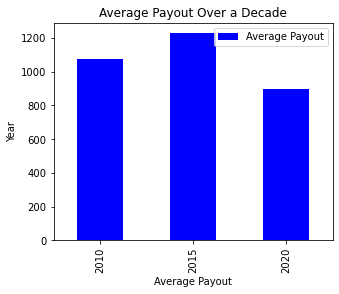

<Figure size 432x288 with 0 Axes>

In [43]:
average_df.plot(kind='bar', facecolor='blue', figsize=(5,4), title='Average Payout Over a Decade')
plt.xlabel('Average Payout')
plt.ylabel('Year')
plt.show()
plt.tight_layout()